### Importación de datos



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ingresos_por_tienda = {
    'tienda': tienda['Precio'].sum(),
    'tienda2': tienda2['Precio'].sum(),
    'tienda3': tienda3['Precio'].sum(),
    'tienda4': tienda4['Precio'].sum()
}
def ingreso_total():
  return sum(ingresos_por_tienda.values())

In [3]:
ingresos = {
    "Tienda": ["Tienda", "Tienda 2", "Tienda 3", "Tienda 4","Total"],
    "Ingreso": [tienda['Precio'].sum(),
                tienda2['Precio'].sum(),
                tienda3['Precio'].sum(),
                tienda4['Precio'].sum(),
                ingreso_total()
                ]
}

tabla_ingresos = pd.DataFrame(ingresos)



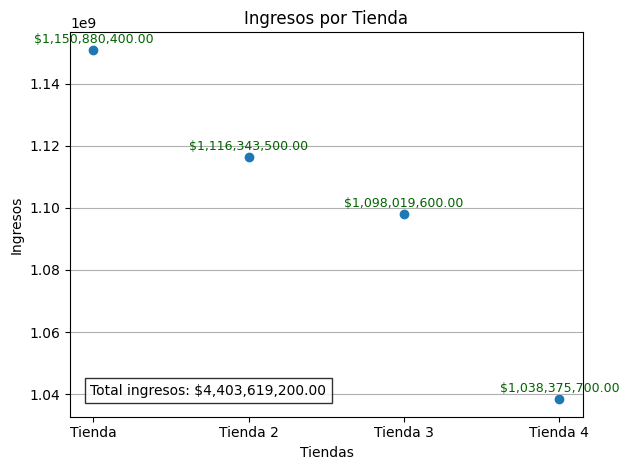

In [4]:
x = tabla_ingresos['Tienda']
y = tabla_ingresos['Ingreso']

# Apply the filter on the Series
x = x[x != 'Total']
y = y[y != ingreso_total()]

fig,ax =plt.subplots()
ax.scatter(x,y)

for i in range(len(x)):
    ax.annotate(f"${y[i]:,.2f}", (x[i], y[i]), textcoords="offset points", xytext=(0,5),
                ha='center', fontsize=9, color='darkgreen')

ax.text(0.50, 0.05, f"Total ingresos: ${ingreso_total():,.2f}",
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.8))

ax.grid(axis="y")
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por Tienda')
plt.tight_layout()
plt.show()

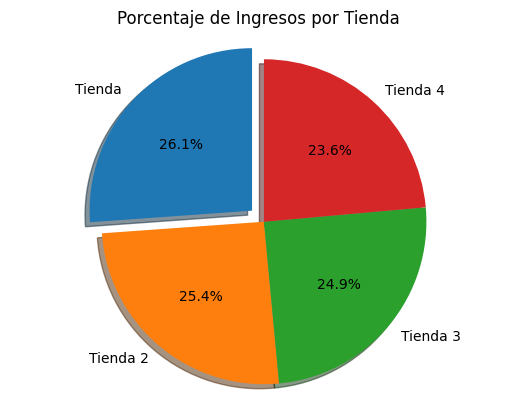

In [5]:
fig, ax = plt.subplots()
x = tabla_ingresos['Tienda']
y = tabla_ingresos['Ingreso']

labels = x[x != 'Total']
sizes = y[y != ingreso_total()]
explode = (0.1, 0, 0, 0)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title('Porcentaje de Ingresos por Tienda')
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

In [6]:
categoria_por_tienda = {
    'tienda': tienda[['Categoría del Producto','Precio']],
    'tienda2': tienda2[['Categoría del Producto','Precio']],
    'tienda3': tienda3[['Categoría del Producto','Precio']],
    'tienda4': tienda4[['Categoría del Producto','Precio']]
}
for nombre, df in categoria_por_tienda.items():
    categorias = df['Categoría del Producto'].unique()
    #print(f"\nCategorías en {nombre}:")
    #print(categorias)

In [7]:
ventas_por_categoria = {}
for tienda, datos in categoria_por_tienda.items():
   conteo = datos['Categoría del Producto'].value_counts()
   ventas_por_categoria[tienda] = conteo


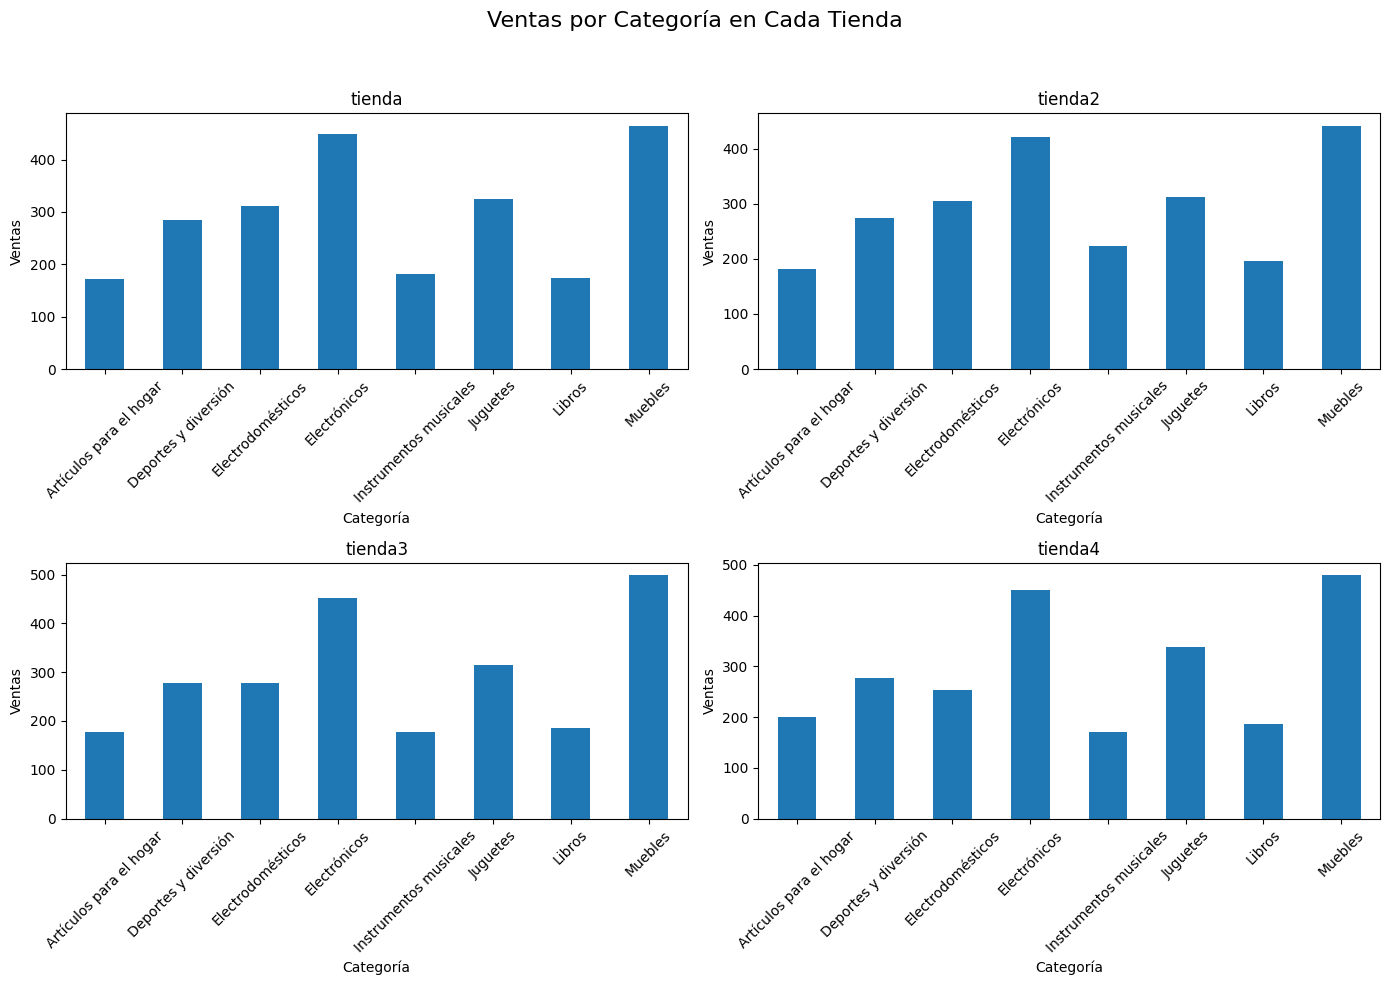

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Ventas por Categoría en Cada Tienda', fontsize=16)

for ax, (nombre_tienda, conteo) in zip(axs.flatten(), ventas_por_categoria.items()):
    conteo = conteo.sort_index()
    conteo.plot(kind='bar', ax=ax)
    ax.set_title(f"{nombre_tienda}")
    ax.set_xlabel('Categoría')
    ax.set_ylabel('Ventas')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. Calificación promedio de la tienda


In [11]:

#Almacena la informacion de la columna Calificación
calificacion_por_tienda = {
    'Tienda': tienda['Calificación'],
    'Tienda 2': tienda2['Calificación'],
    'Tienda 3': tienda3['Calificación'],
    'Tienda 4': tienda4['Calificación']
}
ranking_por_tienda = {}
promedios_ponderados = {}

for tienda, dt in calificacion_por_tienda.items():

    reputacion = dt.value_counts().sort_index()
    ranking_por_tienda[tienda] = reputacion

    suma_ponderada = sum(calificacion * votos for calificacion, votos in reputacion.items())
    total_votos = reputacion.sum()
    promedio = suma_ponderada / total_votos

    promedios_ponderados[tienda] = promedio




In [12]:
tabla_reputacion = pd.DataFrame.from_dict(promedios_ponderados, orient='index', columns=['Calificación']).round(2)
tabla_reputacion.head()


,Calificación
Tienda,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# 4. Productos más y menos vendidos

In [18]:

producto_vendido = {
    'Tienda': tienda['Producto'],
    'Tienda 2': tienda2['Producto'],
    'Tienda 3': tienda3['Producto'],
    'Tienda 4': tienda4['Producto']
}
conteo_por_tienda = {}
for tienda, dt in producto_vendido.items():
    conteo = dt.value_counts()
    conteo_por_tienda[tienda] = conteo



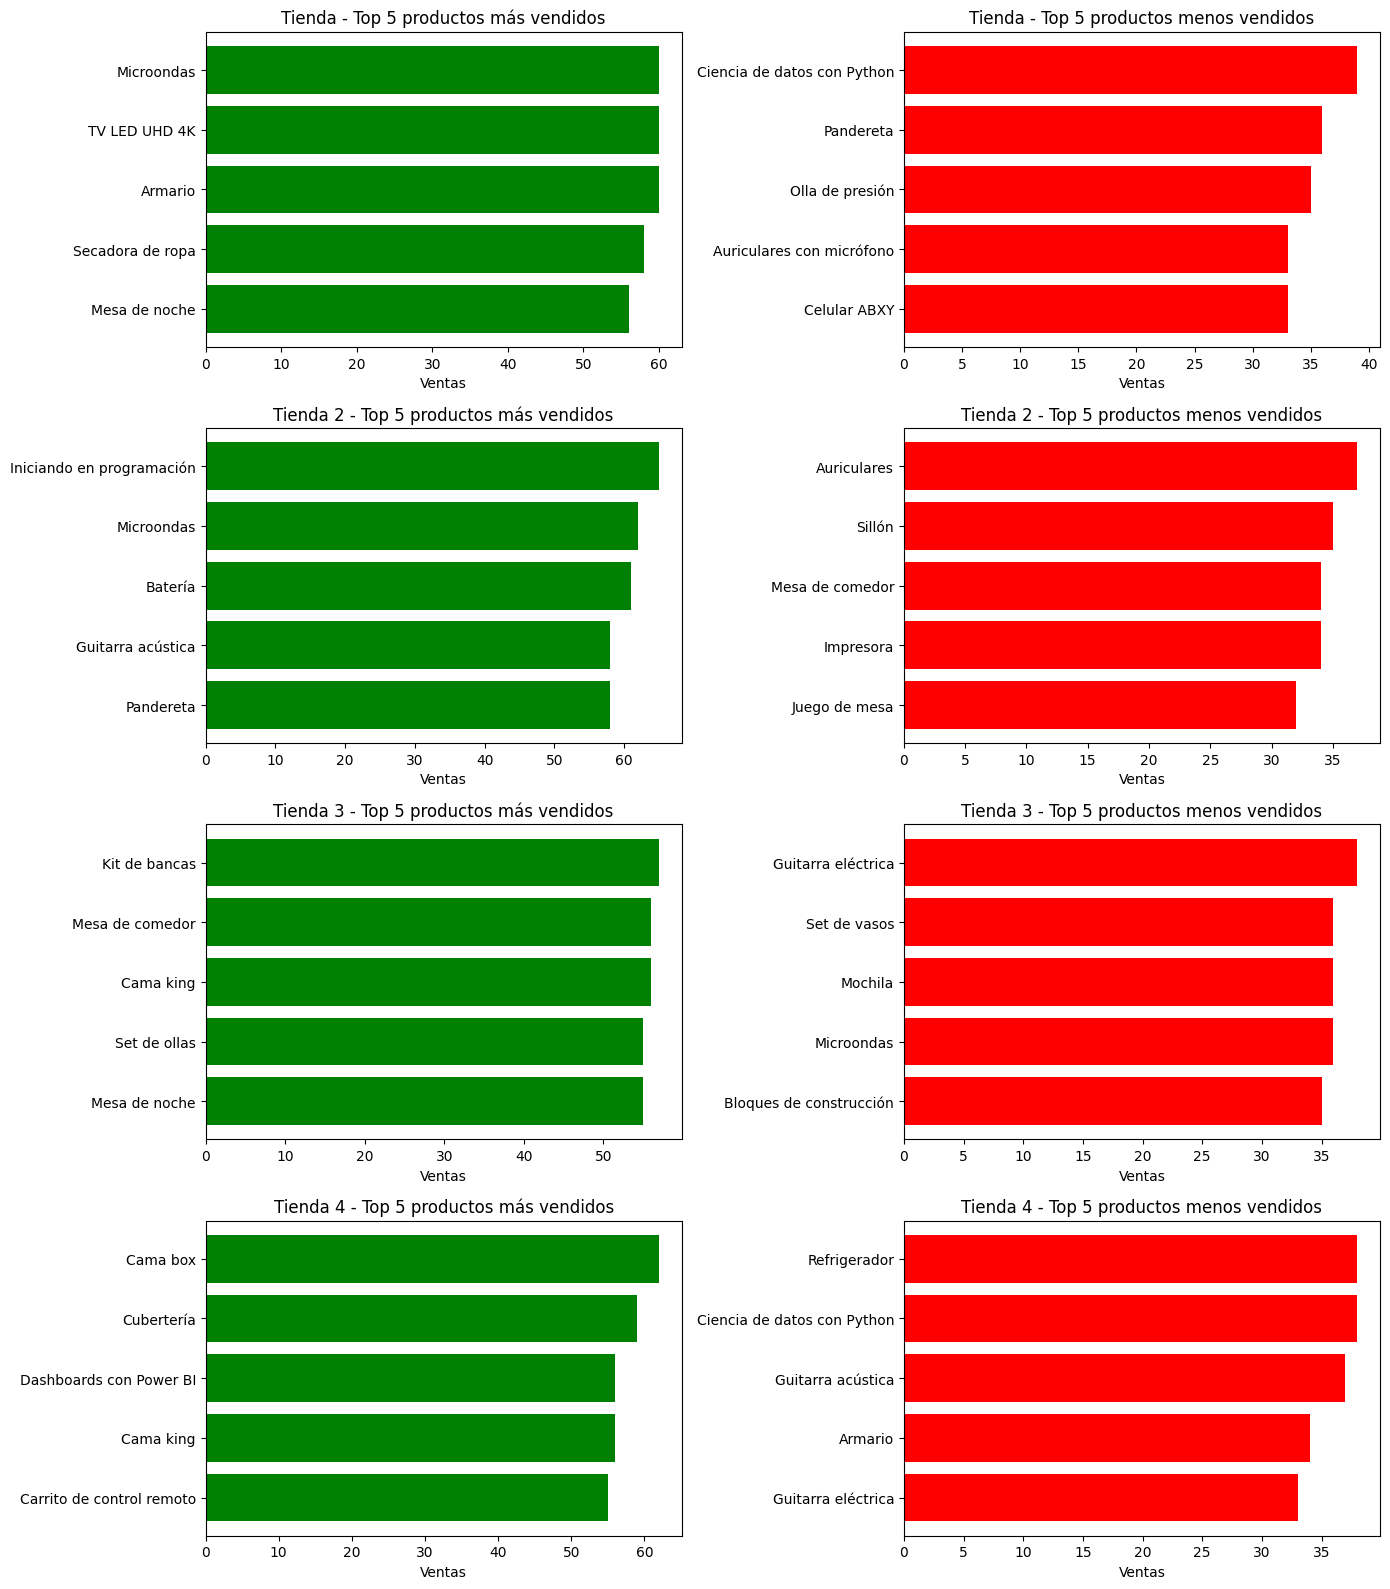

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

for i, (tienda, conteo) in enumerate(conteo_por_tienda.items()):
    top5 = conteo.head(5)
    bottom5 = conteo.tail(5)

    # Más vendidos
    axes[i, 0].barh(top5.index[::-1], top5.values[::-1], color='green')
    axes[i, 0].set_title(f'{tienda} - Top 5 productos más vendidos')
    axes[i, 0].set_xlabel('Ventas')

    # Menos vendidos
    axes[i, 1].barh(bottom5.index[::-1], bottom5.values[::-1], color='red')
    axes[i, 1].set_title(f'{tienda} - Top 5 productos menos vendidos')
    axes[i, 1].set_xlabel('Ventas')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [22]:
envio_por_tienda = {
    'Tienda': tienda['Costo de envío'],
    'Tienda 2': tienda2['Costo de envío'],
    'Tienda 3': tienda3['Costo de envío'],
    'Tienda 4': tienda4['Costo de envío']
}
envios_promedio = {}
for tienda, dt in envio_por_tienda.items():
    promedio = dt.mean()
    envios_promedio[tienda] = promedio


In [23]:
tabla_envios = pd.DataFrame.from_dict(envios_promedio, orient='index', columns=['Costo de Envío Promedio']).round(2)
tabla_envios.map("${:,.2f}".format).head()


,Costo de Envío Promedio
Tienda,"$26,018.61"
Tienda 2,"$25,216.24"
Tienda 3,"$24,805.68"
Tienda 4,"$23,459.46"


**Análisis, Conclusiones y Recomendaciones**

*Objetivo:* Identificar la tienda menos rentable de Alura Store para su posible cierre, analizando ingresos, reseñas, categorías vendidas y tiempos de envío.

*Conclusión*
Tras evaluar los datos, se recomienda cerrar la Tienda 4 debido a:

1-Ingresos más bajos en comparación con las demás.

2-Desempeño mediocre en categorías clave (electrodomésticos y hogar).

3-Bajo impacto comercial, a pesar de tener envíos económicos.

4-Reseñas aceptables, pero no suficientes para compensar su bajo rendimiento.

*Recomendaciones*

1-Redistribuir inventario:

Asignar los productos de la Tienda 4 a otras sucursales, priorizando sus categorías más fuertes.

2-Retención de clientes:

Notificar el cierre y ofrecer alternativas (ej: tienda online, promociones en tiendas cercanas).

3-Análisis adicional:

Investigar si el bajo rendimiento se debe a ubicación, logística o marketing, evaluando una posible reubicación en lugar del cierre.
